In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [2]:
# download file rockpaperscissors dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-07 10:48:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  35.1MB/s    in 9.8s    

2020-10-07 10:48:29 (31.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# extract pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'paper', 'rps-cv-images', 'rock', 'scissors']

In [5]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [6]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [7]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [8]:
# create name directory
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# create directory train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [9]:
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir, 'scissors')
rock_dir = os.path.join(base_dir, 'rock')

In [48]:
# split directory paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# split directory scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

# split directory rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

In [13]:
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
train_rock = os.path.join(train_dir, 'rock')

val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')


if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)
if not os.path.exists(train_rock):
  os.mkdir(train_rock)

if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)
if not os.path.exists(val_rock):
  os.mkdir(val_rock)

In [16]:
import shutil

for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(train_rock,i))


for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))

In [17]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [18]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [19]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [20]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [21]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [22]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [23]:
# create image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 40,
    horizontal_flip = True,
    shear_range = 0.4,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 40,
    horizontal_flip = True,
    shear_range = 0.4,
    fill_mode = 'nearest')

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [25]:
# create model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [27]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [51]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 42s - loss: 0.0435 - accuracy: 0.9912 - val_loss: 0.1541 - val_accuracy: 0.9500
Epoch 2/20
25/25 - 42s - loss: 0.0556 - accuracy: 0.9800 - val_loss: 0.3612 - val_accuracy: 0.9187
Epoch 3/20
25/25 - 42s - loss: 0.1248 - accuracy: 0.9638 - val_loss: 0.1376 - val_accuracy: 0.9375
Epoch 4/20
25/25 - 42s - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0484 - val_accuracy: 0.9812
Epoch 5/20
25/25 - 42s - loss: 0.0269 - accuracy: 0.9925 - val_loss: 0.1090 - val_accuracy: 0.9688
Epoch 6/20
25/25 - 42s - loss: 0.0781 - accuracy: 0.9725 - val_loss: 0.0902 - val_accuracy: 0.9688
Epoch 7/20
25/25 - 45s - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0779 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 42s - loss: 0.0332 - accuracy: 0.9887 - val_loss: 0.1115 - val_accuracy: 0.9812
Epoch 9/20
25/25 - 42s - loss: 0.0232 - accuracy: 0.9937 - val_loss: 0.1210 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 42s - loss: 0.0143 - accuracy: 0.9937 - val_loss: 0.2348 - val_accuracy: 0.9688
Epoch 11/

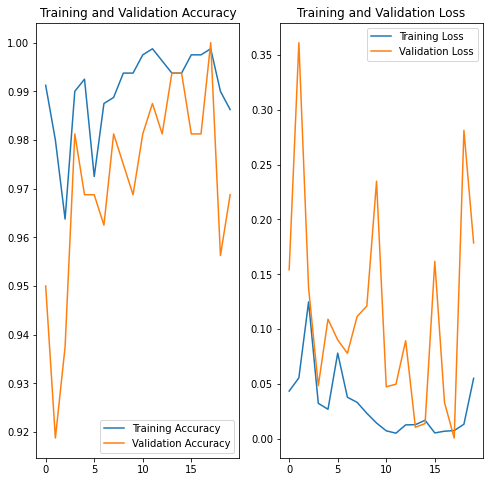

In [52]:
# result visualisasi data training and validation accuracy

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving ZyZeKfG5s1J9Qn64.png to ZyZeKfG5s1J9Qn64 (2).png
ZyZeKfG5s1J9Qn64.png
scissors


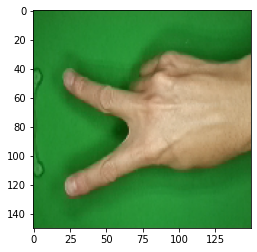

In [57]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting image
  path = fn 
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Name : Muhammad Taufiq Hidayah
From : Kabupaten Kubu Raya, Kalimantan Barat

Thanks Dicoding